In [35]:
# External imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import corner
import seaborn as sns
sns.set_theme()
import arviz as az

import emcee

# Set plot params
plt.rc('font', size=18)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
plt.rc('legend', fontsize=18)    # legend fontsize

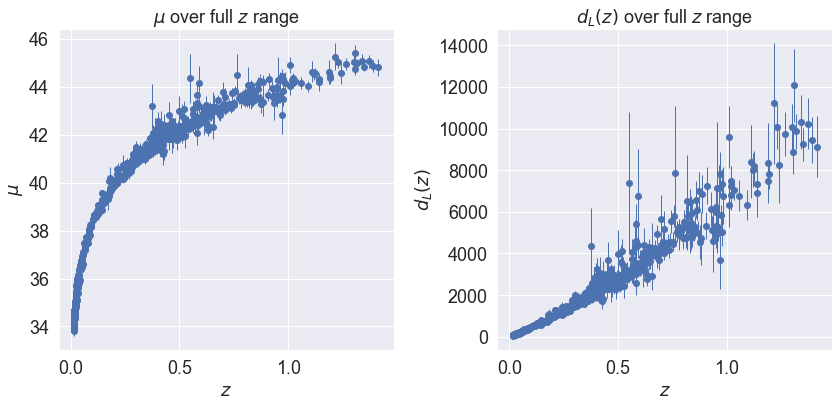

In [4]:
### Imported data
z = np.loadtxt("SCPUnion2.1_mu_vs_z.txt", skiprows = 5, delimiter = "\t",usecols = 1)
mu = np.loadtxt("SCPUnion2.1_mu_vs_z.txt", skiprows = 5, delimiter = "\t",usecols = 2)
delta_mu = np.loadtxt("SCPUnion2.1_mu_vs_z.txt", skiprows = 5, delimiter = "\t",usecols = 3)
data4 = np.loadtxt("SCPUnion2.1_mu_vs_z.txt", skiprows = 5, delimiter = "\t",usecols = 4)

### Sort data for increasing z
sortOrder = np.argsort(z)
z = z[sortOrder]
mu = mu[sortOrder]
delta_mu = delta_mu[sortOrder]
dl = 10**(mu/5-5) # Extract dl(z) from modulus
delta_dl = dl*np.log(10)*delta_mu/5

### Plot the data
fig,ax = plt.subplots(1,2, figsize = (12,6))
ax[0].scatter(z,mu)
ax[0].errorbar(z,mu,delta_mu, linewidth = 0, elinewidth = 1)
ax[0].set_title(r'$\mu$ over full $z$ range')
ax[0].set_xlabel(r'$z$')
ax[0].set_ylabel(r'$\mu$')


ax[1].scatter(z,dl)
ax[1].errorbar(z,dl,delta_dl, linewidth = 0, elinewidth = 1)

ax[1].set_title(r'$d_L(z)$ over full $z$ range')
ax[1].set_xlabel(r'$z$')
ax[1].set_ylabel(r'$d_L(z)$')

plt.tight_layout()

#### Define models

In [20]:
c = 1
H0 = 1
def lambda_CDM(z, Omega_M, Omega_Lambda):
    dl_z = np.zeros(len(z))
    for i, zi in enumerate(z):
        z_prim = np.linspace(0, zi, 100)
        Ez_prim = Omega_M * (1+z_prim)**3 + Omega_Lambda
        Hz_prim = H0 * np.sqrt(Ez_prim)
        dl_z[i] = c*(1+zi) * np.trapz(y=1/Hz_prim, x=z_prim)
    return dl_z

def omega_CDM(z, Omega_M, Omega_Lambda, omega):
    dl_z = np.zeros(len(z))
    for i, zi in enumerate(z):
        z_prim = np.linspace(0, zi, 100)
        Ez_prim = Omega_M * (1+z_prim)**3 + Omega_Lambda*(1+z_prim)**(3*(1+omega))
        Hz_prim = H0 * np.sqrt(Ez_prim)
        dl_z[i] = c*(1+zi) * np.trapz(y=1/Hz_prim, x=z_prim)
    return dl_z

#### Emcee setup

In [36]:
# Priors
def Omega_M_prior(n_points):
    return np.random.uniform(0, 1, n_points)

def Omega_lambda_prior(n_points):
    return np.random.uniform(0, 1, n_points)

def log_prior(theta):
    Omega_M, Omega_lambda = theta
    if 0.0 < Omega_M < 1 and 0.0 < Omega_lambda < 1.0:
        return 0.0
    return -np.inf


def log_likelihood(theta, z, dl, dl_err):
    # Use data weights equal to the measurement variance - i.e. set scale to 1 (known)
#     W = np.diag(dl_err**(-2))
    # TODO Return logarithm of multivariate normal distribution
    pass

